In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

**Table of Contents**

1) Understanding Business Case
2) Variable Description
3) Data Understanding
4) Data Cleaning
5) Data Visualization


**Understanding bussiness case**

Our business case is to predict sales of a store based on given variables, 
So that the company can decide how much sales they will make and the products they must focus on in the inventory.

In [2]:
train_df = pd.read_csv("C:/Users/tufF17/Downloads/store-sales-time-series-forecasting/train.csv")
train_df 

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [3]:
train_df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [5]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
train_df.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [7]:
train_df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [8]:
#Cleaning
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [9]:
train_df[train_df.duplicated(keep='first')]

,id,date,store_nbr,family,sales,onpromotion


In [10]:
train_df.shape

(3000888, 6)

In [11]:
correlation = train_df.corr()

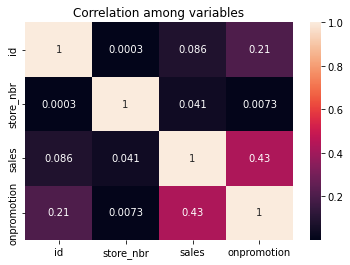

In [12]:
plt.title('Correlation among variables')
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True)
plt.show()

**Heatmap**

Heatmap shows that there isn't much correlation among the variables, so the heatmap isn't that insightful.

**Observation:**
On promotion and sales has a higher value of correlation.
So products on promotion has a higher effect on sales.



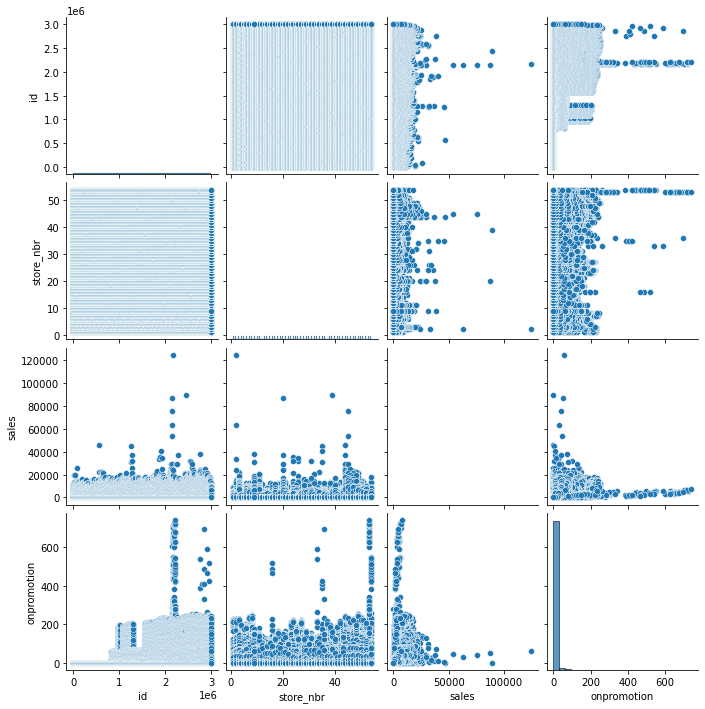

In [13]:
sns.pairplot(train_df)
plt.show()

**Pair Plot**


Pair plot isn't that insightful.

In [14]:
#univariate analysis

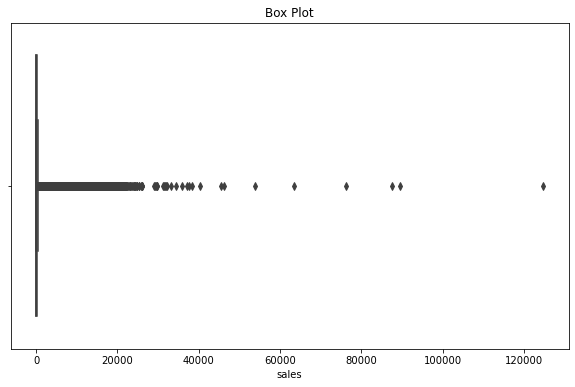

In [15]:
plt.figure(figsize = (10,6))
plt.title('Box Plot')
sns.boxplot(x='sales',data = train_df)
plt.show()

Used to find outliers.


In [16]:
Q1 = train_df['sales'].quantile(0.25)
Q3 = train_df['sales'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

195.84725


In [17]:
train_df[(train_df['sales']< Q1-1.5* IQR) | (train_df['sales']> Q3+1.5* IQR)]

,id,date,store_nbr,family,sales,onpromotion
564,564,2013-01-01,25,BEVERAGES,810.000,0
573,573,2013-01-01,25,GROCERY I,700.000,0
1785,1785,2013-01-02,1,BEVERAGES,1091.000,0
1789,1789,2013-01-02,1,CLEANING,1060.000,0
1790,1790,2013-01-02,1,DAIRY,579.000,0
...,...,...,...,...,...,...
3000863,3000863,2017-08-15,9,DAIRY,835.000,19
3000864,3000864,2017-08-15,9,DELI,551.713,7
3000867,3000867,2017-08-15,9,GROCERY I,6630.383,62
3000880,3000880,2017-08-15,9,PERSONAL CARE,522.000,11


C:\Users\tufF17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


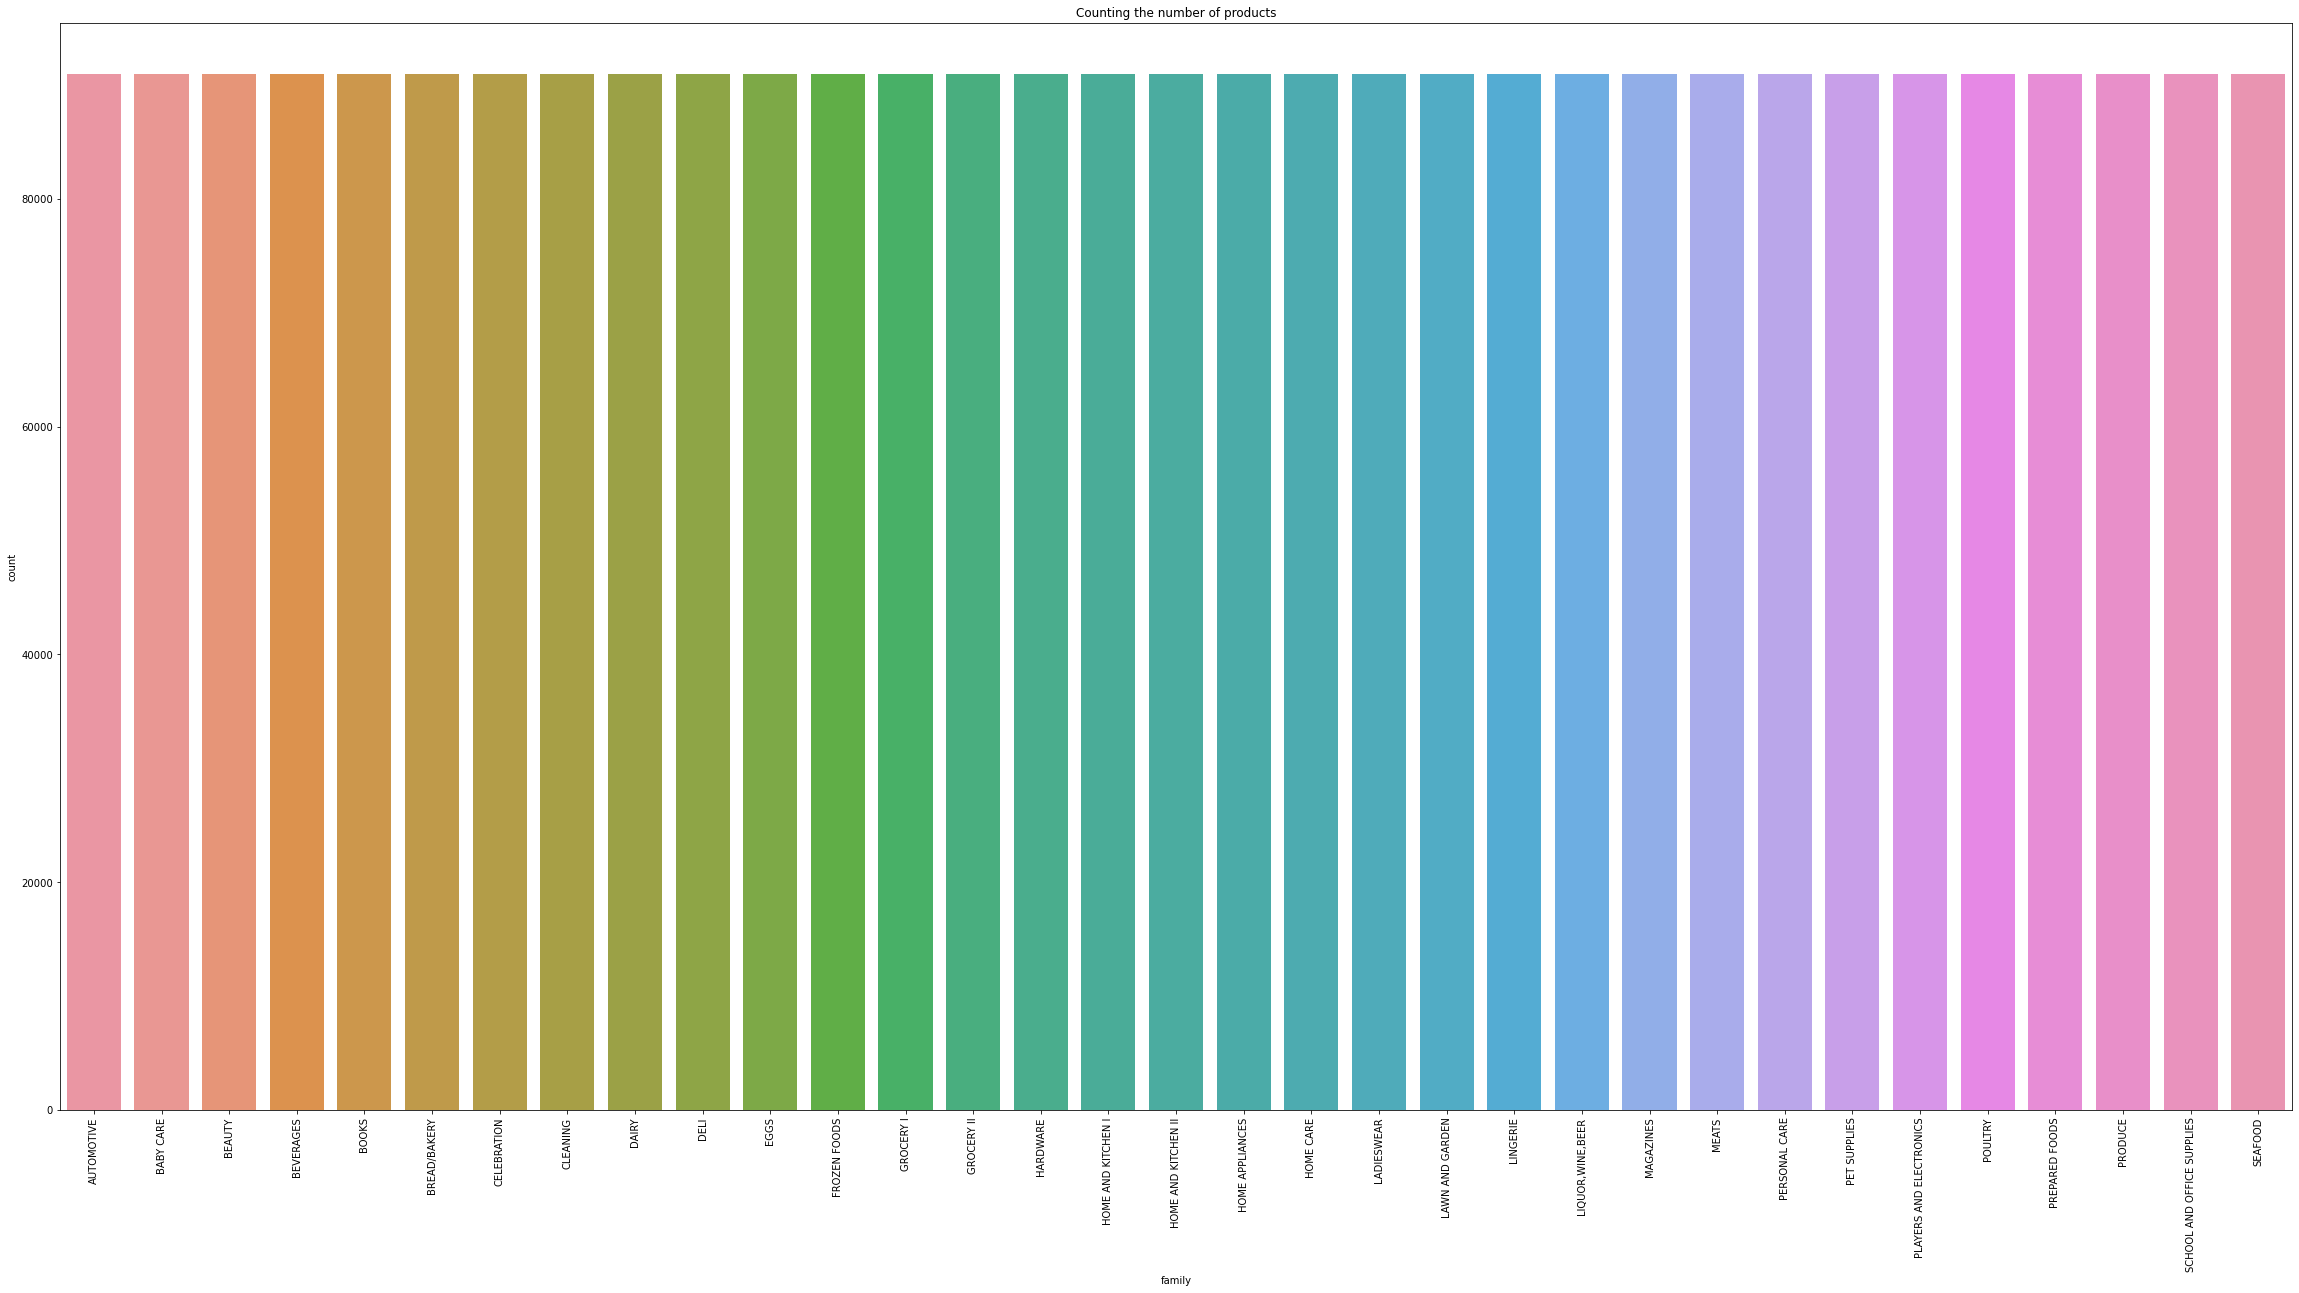

In [18]:
plt.figure(figsize = (40,20))
plt.title('Counting the number of products')
sns.countplot(train_df.family)
plt.xticks(rotation='vertical')
plt.show()

**Count Plot**

Count plot of the products in the store isn't insightful, probably due to the sheer size of the product range in the data set.

In [19]:
train_df.family.value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

C:\Users\tufF17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


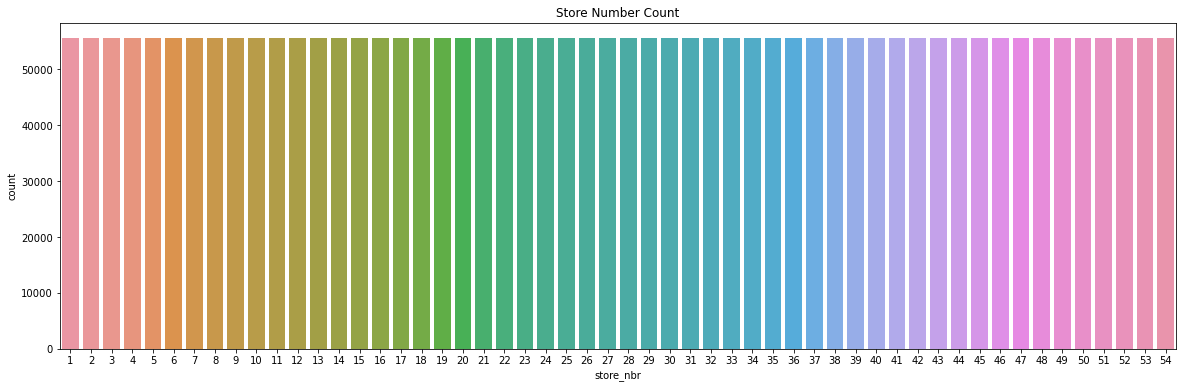

In [20]:
plt.figure(figsize = (20,6))
plt.title('Store Number Count')
sns.countplot(train_df.store_nbr)
plt.show()

**Count Plot**

Gives the count of store numbers in the data set.
No particular observations can be obtained.

In [21]:
train_df.store_nbr.value_counts()

1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    55572
34    55572
33    55572
32    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
9     55572
Name: store_nbr, dtype: int64

In [22]:
train_df['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

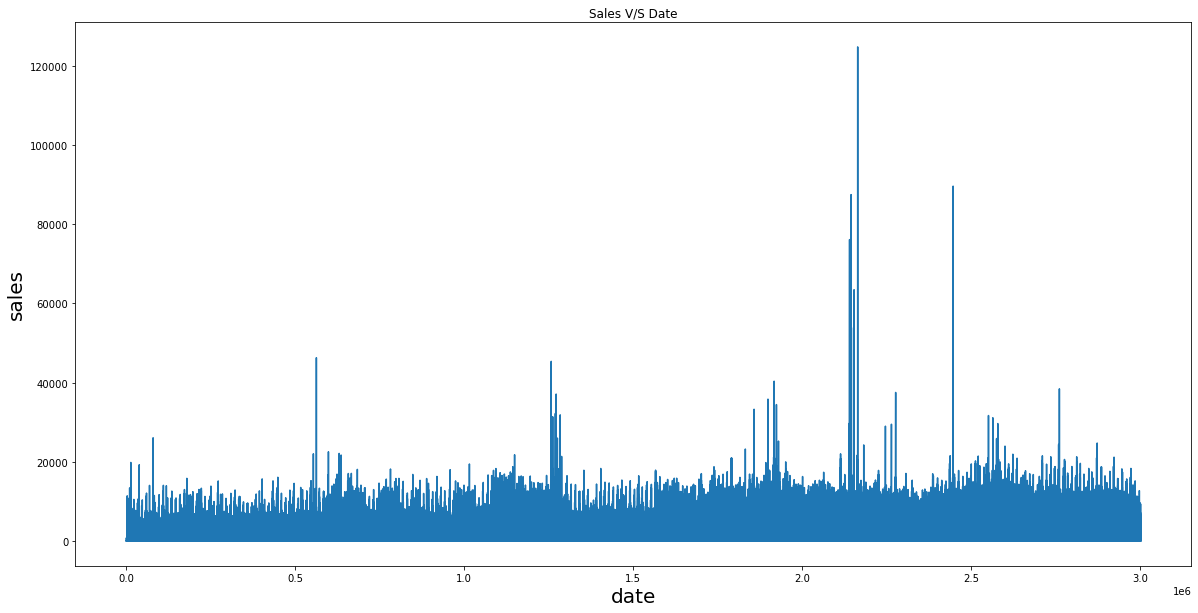

In [23]:
x = train_df.index
y = train_df['sales']
plt.figure(figsize=(20,10))
plt.title('Sales V/S Date')
plt.plot(x,y)
plt.xlabel('date',fontsize = '20')
plt.ylabel('sales',fontsize='20')
plt.show()

Sales V/S date 

Here index is taken in place of date as it is more convinient and since the data set is arranged in increasing date order.
Isn't clear cut due to extensive size of data set.

**Observation**:

Sales peaked during the third quarter of the data set.
Sales reached above 120000.

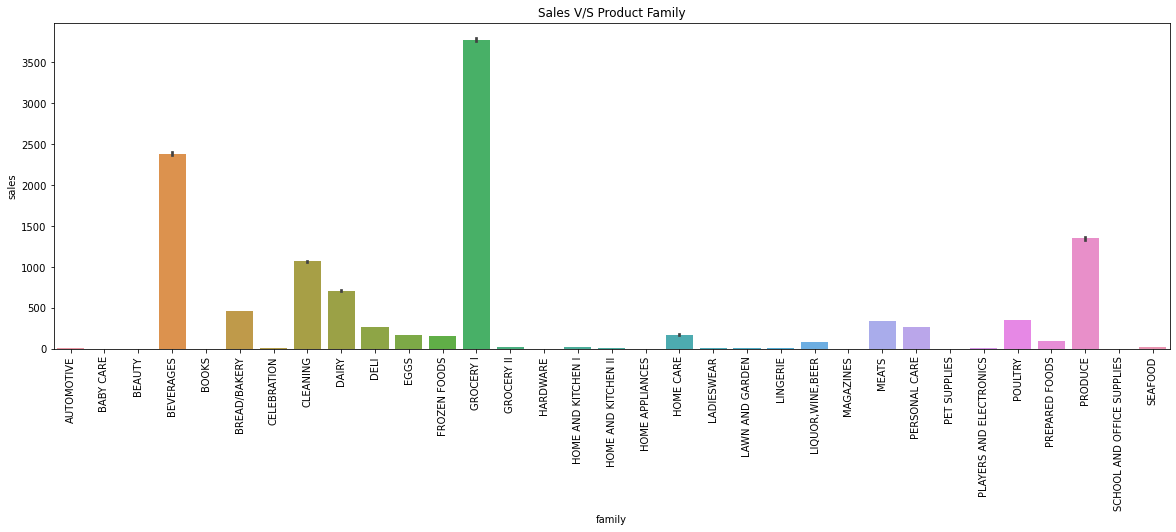

In [24]:
plt.figure(figsize = (20,6))
plt.title('Sales V/S Product Family')
sns.barplot(x = train_df['family'],y= train_df['sales'])
plt.xticks(rotation='vertical')
plt.show()

**Bar Plot**
Shows the sales which occured among a perticular product family.

**Observation:**

Highest sales occured for Grocery I

Followed by Beverages.

Lowest sales for baby care, beauty, electronics and pet supply.

In [25]:
store_df = pd.read_csv("C:/Users/tufF17/Downloads/store-sales-time-series-forecasting/stores.csv")
store_df

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [26]:
store_df.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [27]:
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [28]:
store_df.tail()

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [29]:
store_df.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [30]:
store_df['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [31]:
store_df['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [32]:
store_df['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

C:\Users\tufF17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


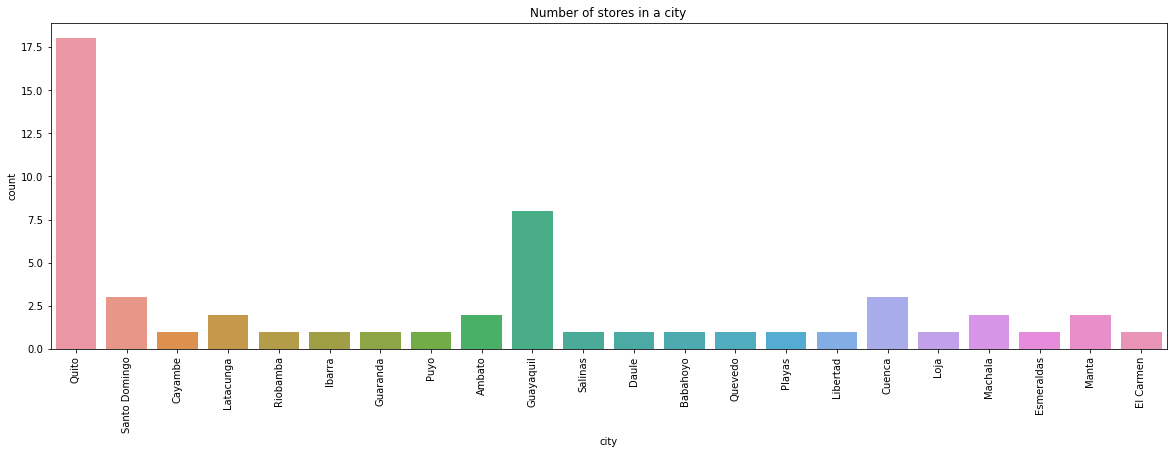

In [33]:
plt.figure(figsize = (20,6))
plt.title('Number of stores in a city')
sns.countplot(store_df.city)
plt.xticks(rotation='vertical')
plt.show()

**Observation:**

Most number of stores are in Quito, followed by Guayaquil and Cuenca.


C:\Users\tufF17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


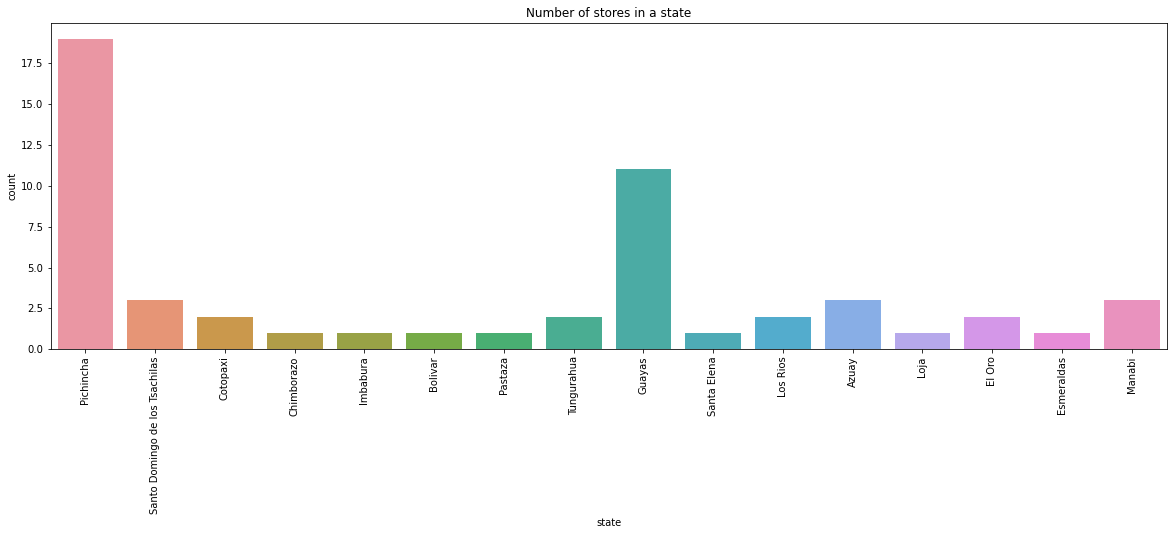

In [34]:
plt.figure(figsize = (20,6))
plt.title('Number of stores in a state')
sns.countplot(store_df.state)
plt.xticks(rotation='vertical')
plt.show()

**Observation:**

Max number of stores are in Pichincha, followed by Guayas and Azuay.

**Trend setting**

In [4]:
new_df=train_df.head(1500)
new_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
...,...,...,...,...,...,...
1495,1495,2013-01-01,50,EGGS,0.0,0
1496,1496,2013-01-01,50,FROZEN FOODS,0.0,0
1497,1497,2013-01-01,50,GROCERY I,0.0,0
1498,1498,2013-01-01,50,GROCERY II,0.0,0


C:\Users\tufF17\AppData\Local\Temp/ipykernel_9516/2977069235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['CMA'] = new_df.sales.expanding().mean()


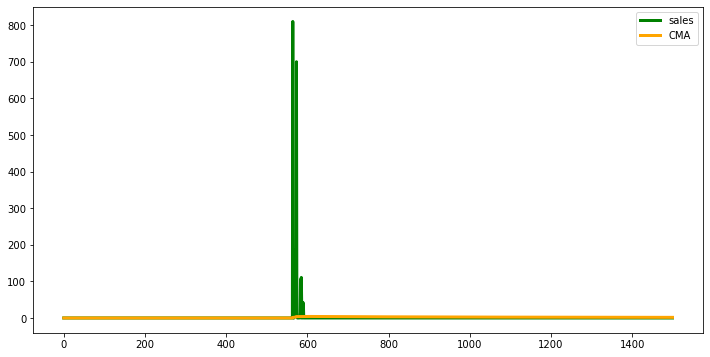

In [5]:
colors = ['green', 'orange']
new_df['CMA'] = new_df.sales.expanding().mean()
new_df[['sales', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.show()

<Figure size 1440x720 with 0 Axes>

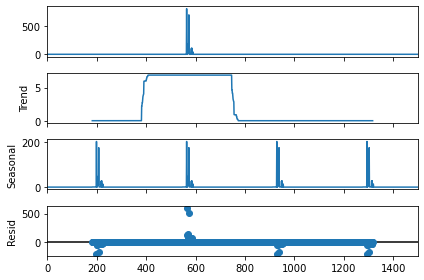

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

y = new_df[['sales']].copy()

decompose_result_mult = seasonal_decompose(y, model="addititive",period=365)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
plt.figure(figsize=(20,10))
decompose_result_mult.plot();


plt.show()

In [7]:
new_df

,id,date,store_nbr,family,sales,onpromotion,CMA
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.000000
1,1,2013-01-01,1,BABY CARE,0.0,0,0.000000
2,2,2013-01-01,1,BEAUTY,0.0,0,0.000000
3,3,2013-01-01,1,BEVERAGES,0.0,0,0.000000
4,4,2013-01-01,1,BOOKS,0.0,0,0.000000
...,...,...,...,...,...,...,...
1495,1495,2013-01-01,50,EGGS,0.0,0,1.678890
1496,1496,2013-01-01,50,FROZEN FOODS,0.0,0,1.677768
1497,1497,2013-01-01,50,GROCERY I,0.0,0,1.676648
1498,1498,2013-01-01,50,GROCERY II,0.0,0,1.675530


In [8]:
import time
start_time = time.time()


 <font size="5">**DIVIDING TRAIN DATA INTO TIME SERIES** <font>

**STORE: 44, Family: Beverages**









In [9]:
stores = ['44']
family =  ['BEVERAGES'] 
train_df[['store_nbr', 'family', 'onpromotion']]= train_df[['store_nbr', 'family', 'onpromotion']].astype(str)
train44_df = train_df.loc[train_df['store_nbr'].isin(stores)]
train44_df = train44_df.loc[train_df['family'].isin(family)]

In [10]:
train44_df

,id,date,store_nbr,family,sales,onpromotion
1257,1257,2013-01-01,44,BEVERAGES,0.0,0
3039,3039,2013-01-02,44,BEVERAGES,5466.0,0
4821,4821,2013-01-03,44,BEVERAGES,3718.0,0
6603,6603,2013-01-04,44,BEVERAGES,4112.0,0
8385,8385,2013-01-05,44,BEVERAGES,6458.0,0
...,...,...,...,...,...,...
2993235,2993235,2017-08-11,44,BEVERAGES,9517.0,15
2995017,2995017,2017-08-12,44,BEVERAGES,9624.0,13
2996799,2996799,2017-08-13,44,BEVERAGES,10491.0,13
2998581,2998581,2017-08-14,44,BEVERAGES,7322.0,12


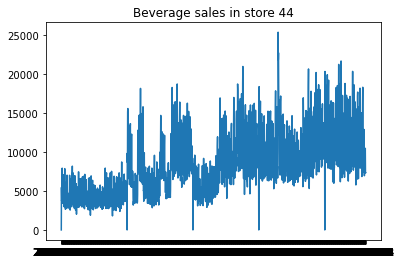

In [11]:
plt.title('Beverage sales in store 44')
plt.plot(train44_df['date'],train44_df['sales'])
plt.show()

<Figure size 1440x720 with 0 Axes>

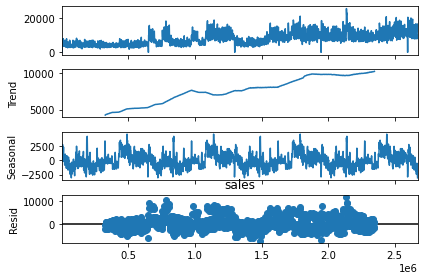

In [12]:
t1 = train44_df.head(1500)
y = t1[['sales']].copy()

decompose_result_mult = seasonal_decompose(y, model="addititive",period=365)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
plt.figure(figsize=(20,10))
decompose_result_mult.plot();

plt.title('sales')
plt.show()

**Trend-Seasonality Graph for Beverages in Store 44**

Beverages in store 44:
Decreasing trend, No seasonality.

**STORE: 1, Family: Home Appliances**

In [13]:
stores = ['1']
family =  ['HOME APPLIANCES'] 
train_df[['store_nbr', 'family', 'onpromotion']]= train_df[['store_nbr', 'family', 'onpromotion']].astype(str)
train1_df = train_df.loc[train_df['store_nbr'].isin(stores)]
train1_df = train1_df.loc[train_df['family'].isin(family)]


In [14]:
train1_df

,id,date,store_nbr,family,sales,onpromotion
17,17,2013-01-01,1,HOME APPLIANCES,0.0,0
1799,1799,2013-01-02,1,HOME APPLIANCES,0.0,0
3581,3581,2013-01-03,1,HOME APPLIANCES,2.0,0
5363,5363,2013-01-04,1,HOME APPLIANCES,0.0,0
7145,7145,2013-01-05,1,HOME APPLIANCES,0.0,0
...,...,...,...,...,...,...
2991995,2991995,2017-08-11,1,HOME APPLIANCES,0.0,0
2993777,2993777,2017-08-12,1,HOME APPLIANCES,0.0,0
2995559,2995559,2017-08-13,1,HOME APPLIANCES,0.0,0
2997341,2997341,2017-08-14,1,HOME APPLIANCES,0.0,0


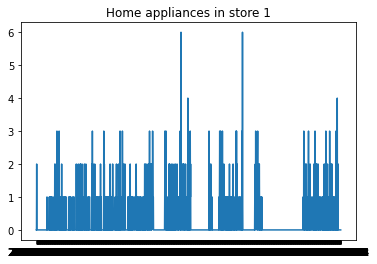

In [15]:
plt.title('Home appliances in store 1')
plt.plot(train1_df['date'],train1_df['sales'])
plt.show()

<Figure size 1440x720 with 0 Axes>

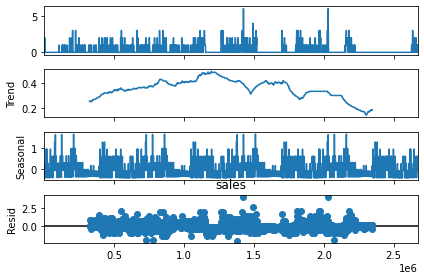

In [16]:
t2 = train1_df.head(1500)
y = t2[['sales']].copy()

decompose_result_mult = seasonal_decompose(y, model="addititive",period=365)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

plt.figure(figsize=(20,10))

decompose_result_mult.plot();

plt.title('sales')
plt.show()

**Trend-Seasonality Graph for Home Appliances in Store 01**

Home Appliances in Store 01: Decreasing Trend, No Seasonality.

**Store: 9, Family: Lingerie**

In [17]:
stores = ['9']
family =  ['LINGERIE'] 
train_df[['store_nbr', 'family', 'onpromotion']]= train_df[['store_nbr', 'family', 'onpromotion']].astype(str)
train9_df = train_df.loc[train_df['store_nbr'].isin(stores)]
train9_df = train9_df.loc[train_df['family'].isin(family)]

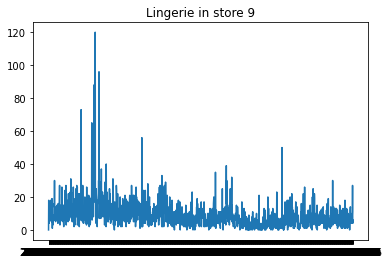

In [18]:
plt.title('Lingerie in store 9')
plt.plot(train9_df['date'],train9_df['sales'])
plt.show()

<Figure size 1440x720 with 0 Axes>

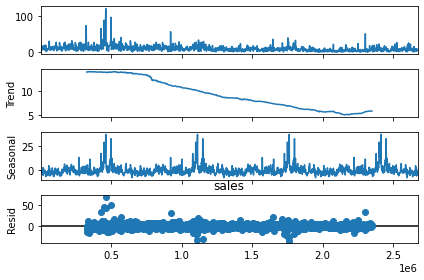

In [19]:
t3 = train9_df.head(1500)
y = t3[['sales']].copy()

decompose_result_mult = seasonal_decompose(y, model="addititive",period=365)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
plt.figure(figsize=(20,10))
decompose_result_mult.plot();

plt.title('sales')
plt.show()


**Trend-Seasonality Graph for Lingerie in Store 09**

Lingerie in Store 9: Decreasing Trend, No Seasonality pattern as such.

**Store: 10, Family: Ladieswear**

In [20]:
stores = ['10']
family =  ['LADIESWEAR'] 
train_df[['store_nbr', 'family', 'onpromotion']]= train_df[['store_nbr', 'family', 'onpromotion']].astype(str)
train10_df = train_df.loc[train_df['store_nbr'].isin(stores)]
train10_df = train10_df.loc[train_df['family'].isin(family)]

In [21]:
train10_df


,id,date,store_nbr,family,sales,onpromotion
52,52,2013-01-01,10,LADIESWEAR,0.0,0
1834,1834,2013-01-02,10,LADIESWEAR,0.0,0
3616,3616,2013-01-03,10,LADIESWEAR,0.0,0
5398,5398,2013-01-04,10,LADIESWEAR,0.0,0
7180,7180,2013-01-05,10,LADIESWEAR,0.0,0
...,...,...,...,...,...,...
2992030,2992030,2017-08-11,10,LADIESWEAR,2.0,0
2993812,2993812,2017-08-12,10,LADIESWEAR,8.0,0
2995594,2995594,2017-08-13,10,LADIESWEAR,2.0,0
2997376,2997376,2017-08-14,10,LADIESWEAR,2.0,0


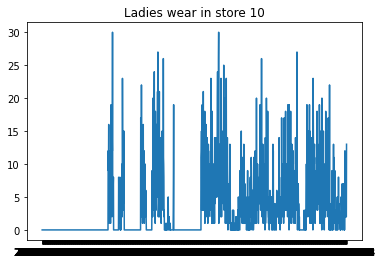

In [22]:
plt.title('Ladies wear in store 10')
plt.plot(train10_df['date'],train10_df['sales'])
plt.show()

<Figure size 1440x720 with 0 Axes>

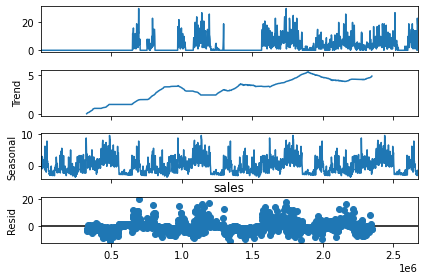

In [23]:
t4 = train10_df.head(1500)
y = t4[['sales']].copy()

decompose_result_mult = seasonal_decompose(y, model="addititive",period=365)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
plt.figure(figsize=(20,10))
decompose_result_mult.plot();

plt.title('sales')
plt.show()

**Trend-Seasonality Graph for Ladies Wear in Store 10**

Ladies Wear in Store 10: The data points are 0. 

**Store: 15, Family: Grocery II**

In [24]:
stores = ['15']
family =  ['GROCERY II'] 
train_df[['store_nbr', 'family', 'onpromotion']]= train_df[['store_nbr', 'family', 'onpromotion']].astype(str)
train15_df = train_df.loc[train_df['store_nbr'].isin(stores)]
train15_df = train15_df.loc[train_df['family'].isin(family)]

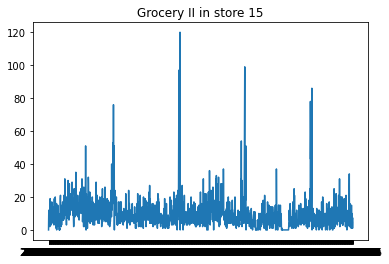

In [25]:
plt.title('Grocery II in store 15')
plt.plot(train15_df['date'],train15_df['sales'])
plt.show()

<Figure size 1440x720 with 0 Axes>

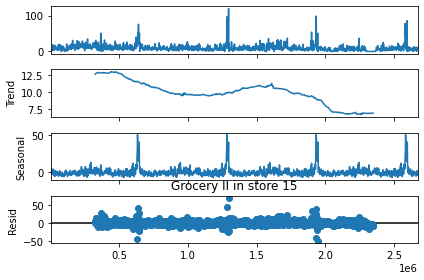

In [26]:
t5 = train15_df.head(1500)
y = t5[['sales']].copy()

decompose_result_mult = seasonal_decompose(y, model="addititive",period=365)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

plt.figure(figsize=(20,10))

decompose_result_mult.plot();

plt.title('Grocery II in store 15')
plt.show()

**Trend-Seasonality Graph for Grocery II in Store 15**

Grocery II in Store 15: Decreasing Trend, No seasonality pattern as such.

**Store: 49, Family: Grocery I**

In [27]:
stores = ['49']
family =  ['GROCERY I'] 
train_df[['store_nbr', 'family', 'onpromotion']]= train_df[['store_nbr', 'family', 'onpromotion']].astype(str)
train49_df = train_df.loc[train_df['store_nbr'].isin(stores)]
train49_df = train49_df.loc[train_df['family'].isin(family)]

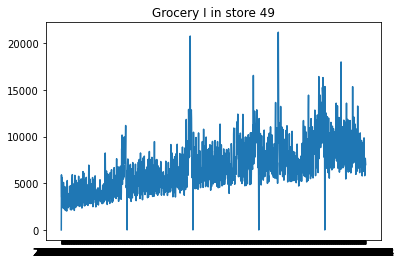

In [28]:
plt.title('Grocery I in store 49')
plt.plot(train49_df['date'],train49_df['sales'])
plt.show()

<Figure size 1440x720 with 0 Axes>

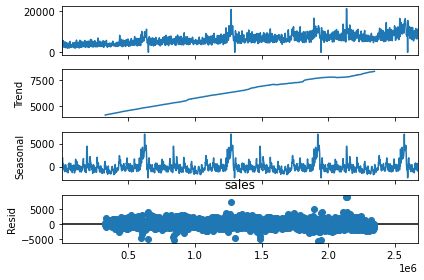

In [29]:
t6 = train49_df.head(1500)
y = t6[['sales']].copy()

decompose_result_mult = seasonal_decompose(y, model="addititive",period=365)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
plt.figure(figsize=(20,10))
decompose_result_mult.plot();

plt.title('sales')
plt.show()

**Trend-Seasonality Graph for Grocery I in Store 49**

 Grocery I in Store 49: Decreasing Trend, No Seasonality.





 <font size="5">**PREDICTION USING ML MODELS ON THE SLICED TIME SERIES** </font>


 <font size="3">**Store: 44
Family: Beverage** <font>

**OLS**

In [31]:
train44_df

,id,date,store_nbr,family,sales,onpromotion
1257,1257,2013-01-01,44,BEVERAGES,0.0,0
3039,3039,2013-01-02,44,BEVERAGES,5466.0,0
4821,4821,2013-01-03,44,BEVERAGES,3718.0,0
6603,6603,2013-01-04,44,BEVERAGES,4112.0,0
8385,8385,2013-01-05,44,BEVERAGES,6458.0,0
...,...,...,...,...,...,...
2993235,2993235,2017-08-11,44,BEVERAGES,9517.0,15
2995017,2995017,2017-08-12,44,BEVERAGES,9624.0,13
2996799,2996799,2017-08-13,44,BEVERAGES,10491.0,13
2998581,2998581,2017-08-14,44,BEVERAGES,7322.0,12


In [32]:
x = train44_df['id']
y = train44_df['sales']

In [33]:
x1 = sm.add_constant(x)
model = sm.OLS(y,x1)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     875.8
Date:                Sun, 20 Aug 2023   Prob (F-statistic):          2.65e-155
Time:                        09:14:11   Log-Likelihood:                -15954.
No. Observations:                1684   AIC:                         3.191e+04
Df Residuals:                    1682   BIC:                         3.192e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4030.4657    153.619     26.237      0.000    3729.161    4331.770
id             0.0026   8.86e-05     29.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      311.483   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.499
Skew:                           1.161   Prob(JB):                    1.29e-119
Kurtosis:                       4.552   Cond. No.                     3.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
y1 = 4030.4657 + 0.0026*x

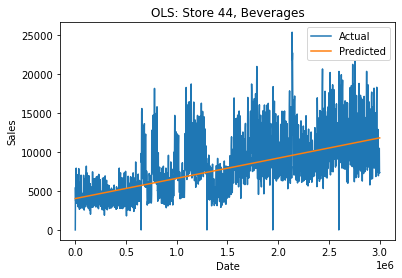

In [38]:
plt.title('OLS: Store 44, Beverages')
plt.plot(x,y, label= 'Actual')
plt.plot(x,y1, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [39]:
n = mean_squared_error(x,y1)
rmse = sqrt(n)
print('RMSE of OLS is',rmse)

RMSE of OLS is 1724885.3823506867


**Linear Regression**

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
x = train44_df['id']
y = train44_df['sales']

In [42]:
x.shape

(1684,)

In [43]:
y.shape

(1684,)

In [44]:
x_new = x.values.reshape(-1,1)
x_new.shape

(1684, 1)

In [45]:
reg = LinearRegression()
reg.fit(x_new,y)

LinearRegression()

In [46]:
reg.score(x_new,y)

0.34240673690236645

In [47]:
reg.coef_

array([0.00262351])

In [48]:
reg.intercept_

4030.4657495303763

In [49]:
new_data = pd.DataFrame(data=[2993235,2995017], columns=['id'])
new_data

,id
0,2993235
1,2995017


In [50]:
reg.predict(new_data)

C:\Users\tufF17\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([11883.23567775, 11887.91076541])

In [51]:
y1 = 4030.4657495303763 + 0.00262351*x_new

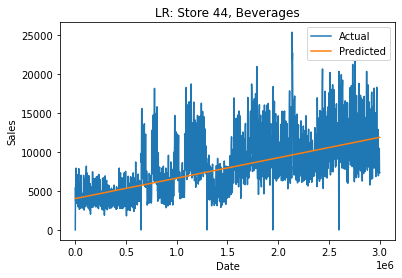

In [52]:
plt.title('LR: Store 44, Beverages')
plt.plot(x,y, label= 'Actual')
plt.plot(x,y1, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [53]:
n = mean_squared_error(x,y1)
rmse = sqrt(n)
print('RMSE of LR is',rmse)

RMSE of LR is 1724844.6423175693


**Multiple Linear Regression**

In [59]:
x = train44_df[['id','onpromotion']]
y = train44_df['sales']

In [60]:
reg = LinearRegression()
reg.fit(x,y)


LinearRegression()

In [61]:
reg.score(x,y)

0.3450604604401212

In [62]:
reg.coef_

array([2.39325926e-03, 1.39513624e+01])

In [63]:
reg.intercept_

4183.180370681826

In [65]:
d = {'id':[2993235,2995017],'onpromotion':[15,13]}
new_data = pd.DataFrame(d)
new_data

,id,onpromotion
0,2993235,15
1,2995017,13


In [66]:
reg.predict(new_data)

array([11556.03818843, 11532.40025154])

In [69]:
x['onpromotion'] = pd.to_numeric(x['onpromotion'], errors='coerce')

C:\Users\tufF17\AppData\Local\Temp/ipykernel_13780/3637824609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['onpromotion'] = pd.to_numeric(x['onpromotion'], errors='coerce')


In [70]:
y1 = 2.39325926e-03*x['id'] + 1.39513624e+01*x['onpromotion'] + 4183.180370681826

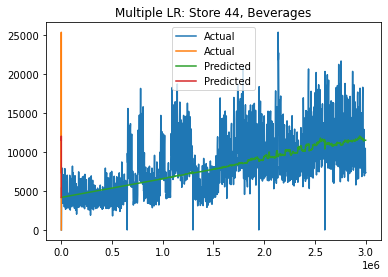

In [71]:
plt.title('Multiple LR: Store 44, Beverages')
plt.plot(x,y, label='Actual')
plt.plot(x,y1, label='Predicted')
plt.legend()
plt.show()

**ARIMA**

In [30]:
from pmdarima.arima import auto_arima

from pmdarima.arima import ADFTest

In [31]:
t44_df = train44_df.copy()

In [32]:
train_df = t44_df.loc[t44_df["date"]<='2017-01-01']
test_df = t44_df.loc[t44_df["date"]>'2017-01-01']

In [33]:
train_df

,id,date,store_nbr,family,sales,onpromotion
1257,1257,2013-01-01,44,BEVERAGES,0.0,0
3039,3039,2013-01-02,44,BEVERAGES,5466.0,0
4821,4821,2013-01-03,44,BEVERAGES,3718.0,0
6603,6603,2013-01-04,44,BEVERAGES,4112.0,0
8385,8385,2013-01-05,44,BEVERAGES,6458.0,0
...,...,...,...,...,...,...
2590503,2590503,2016-12-28,44,BEVERAGES,9592.0,85
2592285,2592285,2016-12-29,44,BEVERAGES,9289.0,79
2594067,2594067,2016-12-30,44,BEVERAGES,13050.0,88
2595849,2595849,2016-12-31,44,BEVERAGES,12033.0,88


In [34]:
test_df

,id,date,store_nbr,family,sales,onpromotion
2599413,2599413,2017-01-02,44,BEVERAGES,20369.0,62
2601195,2601195,2017-01-03,44,BEVERAGES,13087.0,59
2602977,2602977,2017-01-04,44,BEVERAGES,12080.0,70
2604759,2604759,2017-01-05,44,BEVERAGES,9631.0,46
2606541,2606541,2017-01-06,44,BEVERAGES,10985.0,40
...,...,...,...,...,...,...
2993235,2993235,2017-08-11,44,BEVERAGES,9517.0,15
2995017,2995017,2017-08-12,44,BEVERAGES,9624.0,13
2996799,2996799,2017-08-13,44,BEVERAGES,10491.0,13
2998581,2998581,2017-08-14,44,BEVERAGES,7322.0,12


In [35]:
train44 = train_df.set_index('date')
test44 = test_df.set_index('date')

In [36]:
train44['sales']=train44['sales']-train44['sales'].shift(1)
test44['sales']=test44['sales']-test44['sales'].shift(1)

In [37]:
train44 = train44['sales']
test44 = test44['sales']

In [38]:
train44

date
2013-01-01        NaN
2013-01-02     5466.0
2013-01-03    -1748.0
2013-01-04      394.0
2013-01-05     2346.0
               ...   
2016-12-28      485.0
2016-12-29     -303.0
2016-12-30     3761.0
2016-12-31    -1017.0
2017-01-01   -12033.0
Name: sales, Length: 1458, dtype: float64

In [39]:
test44

date
2017-01-02       NaN
2017-01-03   -7282.0
2017-01-04   -1007.0
2017-01-05   -2449.0
2017-01-06    1354.0
               ...  
2017-08-11    1922.0
2017-08-12     107.0
2017-08-13     867.0
2017-08-14   -3169.0
2017-08-15      29.0
Name: sales, Length: 226, dtype: float64

In [42]:
train44 = train44.dropna()
test44 = test44.dropna()

In [51]:
test44

,date,sales
0,2017-01-03,-7282.0
1,2017-01-04,-1007.0
2,2017-01-05,-2449.0
3,2017-01-06,1354.0
4,2017-01-07,6345.0
...,...,...
220,2017-08-11,1922.0
221,2017-08-12,107.0
222,2017-08-13,867.0
223,2017-08-14,-3169.0


In [43]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(train44)

(0.01, False)

In [44]:
model = auto_arima(train44, start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=None,         
                      start_P=0, 
                      start_Q =0,
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=27406.094, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=27407.909, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=27249.414, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=27404.094, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26995.861, Time=0.70 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=26778.182, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=27077.563, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=26742.709, Time=1.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=27076.254, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=26579.628, Time=0.38 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=26954.645, Time=0.13 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=26164.314, Time=0.50 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=26311.285, Time=0.26 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=25977.095, Time=1.31 sec
 ARIMA(4,0,2)(0,0,0

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1457
Model:               SARIMAX(5, 0, 2)   Log Likelihood              -12979.553
Date:                Thu, 31 Aug 2023   AIC                          25975.106
Time:                        16:00:09   BIC                          26017.379
Sample:                             0   HQIC                         25990.877
                               - 1457                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1981      0.027      7.338      0.000       0.145       0.251
ar.L2         -0.8223      0.019    -44.288      0.000      -0.859      -0.786
ar.L3         -0.1821      0.026     -6.929      0.000      -0.234      -0.131
ar.L4         -0.3973      0.020    -19.681      0.000      -0.437      -0.358
ar.L5         -0.5189      0.023    -22.512      0.000      -0.564      -0.474
ma.L1         -0.6677      0.027    -25.089      0.000      -0.720      -0.616
ma.L2          0.4833      0.029     16.953      0.000       0.427       0.539
sigma2       3.19e+06   5.52e+04     57.804      0.000    3.08e+06     3.3e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4930.04
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
pred = model.predict(n_periods=225)

C:\Users\tufF17\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tufF17\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [53]:
pred

1457    5993.185839
1458    3953.110635
1459   -3501.695191
1460     273.201970
1461    6076.779430
           ...     
1677       0.220809
1678     -19.304186
1679     -23.669372
1680     -10.233556
1681      10.282854
Length: 225, dtype: float64

In [54]:
test44 = test44.reset_index()
pred = pred.reset_index()
pred

,index,0
0,1457,5993.185839
1,1458,3953.110635
2,1459,-3501.695191
3,1460,273.201970
4,1461,6076.779430
...,...,...
220,1677,0.220809
221,1678,-19.304186
222,1679,-23.669372
223,1680,-10.233556


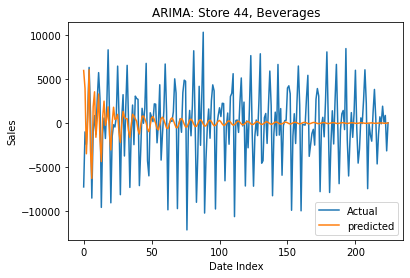

In [55]:
plt.title('ARIMA: Store 44, Beverages')
plt.plot(test44['sales'],label='Actual')
plt.plot(pred[0],label='predicted')
plt.xlabel('Date Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [56]:
n = mean_squared_error(pred[0],test44['sales'])
rmse = sqrt(n)
print('RMSE of ARIMA is',rmse)

RMSE of ARIMA is 4036.4885804563005


**_________________________________________________________________________________________________________**


 <font size="3">**Store: 01
Family: Home Appliances** </font>

**OLS** 


In [90]:
train1_df

,id,date,store_nbr,family,sales,onpromotion
17,17,2013-01-01,1,HOME APPLIANCES,0.0,0
1799,1799,2013-01-02,1,HOME APPLIANCES,0.0,0
3581,3581,2013-01-03,1,HOME APPLIANCES,2.0,0
5363,5363,2013-01-04,1,HOME APPLIANCES,0.0,0
7145,7145,2013-01-05,1,HOME APPLIANCES,0.0,0
...,...,...,...,...,...,...
2991995,2991995,2017-08-11,1,HOME APPLIANCES,0.0,0
2993777,2993777,2017-08-12,1,HOME APPLIANCES,0.0,0
2995559,2995559,2017-08-13,1,HOME APPLIANCES,0.0,0
2997341,2997341,2017-08-14,1,HOME APPLIANCES,0.0,0


In [91]:
x = train1_df['id']
y = train1_df['sales']

In [92]:
x1 = sm.add_constant(x)
model = sm.OLS(y,x1)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8822
Date:                Sun, 20 Aug 2023   Prob (F-statistic):              0.348
Time:                        09:22:45   Log-Likelihood:                -1750.4
No. Observations:                1684   AIC:                             3505.
Df Residuals:                    1682   BIC:                             3516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3108      0.033      9.318      0.000       0.245       0.376
id          1.809e-08   1.93e-08      0.939      0.348   -1.97e-08    5.59e-08
==============================================================================
Omnibus:                      948.973   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7654.265
Skew:                           2.571   Prob(JB):                         0.00
Kurtosis:                      12.091   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
y1 = 0.3108 + 1.809e-08*x

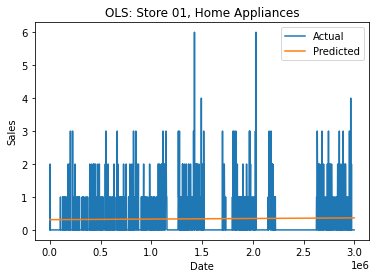

In [95]:
plt.title('OLS: Store 01, Home Appliances')
plt.plot(x,y, label= 'Actual')
plt.plot(x,y1, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [96]:
n = mean_squared_error(x,y1)
rmse = sqrt(n)
print('RMSE of OLS is',rmse)

RMSE of OLS is 1731806.2666889192


**Linear Regression**

In [97]:
from sklearn.linear_model import LinearRegression

In [107]:
train1_df

,id,date,store_nbr,family,sales,onpromotion
17,17,2013-01-01,1,HOME APPLIANCES,0.0,0
1799,1799,2013-01-02,1,HOME APPLIANCES,0.0,0
3581,3581,2013-01-03,1,HOME APPLIANCES,2.0,0
5363,5363,2013-01-04,1,HOME APPLIANCES,0.0,0
7145,7145,2013-01-05,1,HOME APPLIANCES,0.0,0
...,...,...,...,...,...,...
2991995,2991995,2017-08-11,1,HOME APPLIANCES,0.0,0
2993777,2993777,2017-08-12,1,HOME APPLIANCES,0.0,0
2995559,2995559,2017-08-13,1,HOME APPLIANCES,0.0,0
2997341,2997341,2017-08-14,1,HOME APPLIANCES,0.0,0


In [98]:
x = train1_df['id']
y = train1_df['sales']

In [99]:
x.shape

(1684,)

In [100]:
y.shape

(1684,)

In [101]:
x_new = x.values.reshape(-1,1)
x_new.shape

(1684, 1)

In [102]:
reg = LinearRegression()
reg.fit(x_new,y)

LinearRegression()

In [103]:
reg.score(x_new,y)

0.0005242081101236584

In [104]:
reg.coef_

array([1.80879547e-08])

In [105]:
reg.intercept_

0.31076183154069587

In [108]:
new_data = pd.DataFrame(data=[2991995,2993777], columns=['id'])
new_data

,id
0,2991995
1,2993777


In [109]:
reg.predict(new_data)

C:\Users\tufF17\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([0.3648809 , 0.36491313])

In [110]:
y1 = 0.31076183154069587 + 1.80879547e-08*x_new

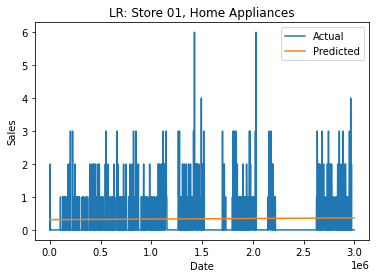

In [111]:
plt.title('LR: Store 01, Home Appliances')
plt.plot(x,y, label= 'Actual')
plt.plot(x,y1, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [112]:
n = mean_squared_error(x,y1)
rmse = sqrt(n)
print('RMSE of LR is',rmse)

RMSE of LR is 1731806.2667255113


**Multiple Linear Regression**

In [113]:
x = train1_df[['id','onpromotion']]
y = train1_df['sales']

In [114]:
reg = LinearRegression()
reg.fit(x,y)


LinearRegression()

In [115]:
reg.score(x,y)

0.0005242081101236584

In [116]:
reg.coef_

array([1.80879547e-08, 0.00000000e+00])

In [117]:
reg.intercept_

0.31076183154069587

In [118]:
d = {'id':[2991995,2993777],'store_nbr':[0,0]}
new_data = pd.DataFrame(d)
new_data

,id,store_nbr
0,2991995,0
1,2993777,0


In [119]:
reg.predict(new_data)

C:\Users\tufF17\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- store_nbr
Feature names seen at fit time, yet now missing:
- onpromotion

  warnings.warn(message, FutureWarning)


array([0.3648809 , 0.36491313])

In [120]:
x['onpromotion'] = pd.to_numeric(x['onpromotion'], errors='coerce')

C:\Users\tufF17\AppData\Local\Temp/ipykernel_13780/3637824609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['onpromotion'] = pd.to_numeric(x['onpromotion'], errors='coerce')


In [122]:
y1 = 1.80879547e-08*x['id'] + 0.00000000e+00*x['onpromotion']+ 0.31076183154069587

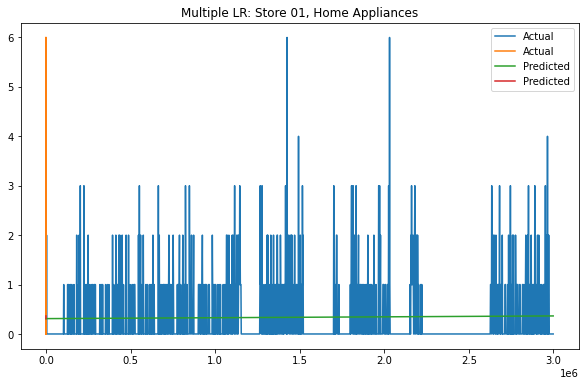

In [123]:
plt.figure(figsize=(10,6))
plt.title('Multiple LR: Store 01, Home Appliances')

plt.plot(x,y, label='Actual')
plt.plot(x,y1, label='Predicted')
plt.legend()
plt.show()

**ARIMA**

In [58]:
from pmdarima.arima import auto_arima

from pmdarima.arima import ADFTest

In [59]:
t1_df = train1_df.copy()

In [60]:
train_df = t1_df.loc[t1_df["date"]<='2017-01-01']
test_df = t1_df.loc[t1_df["date"]>'2017-01-01']

In [61]:
train_df

,id,date,store_nbr,family,sales,onpromotion
17,17,2013-01-01,1,HOME APPLIANCES,0.0,0
1799,1799,2013-01-02,1,HOME APPLIANCES,0.0,0
3581,3581,2013-01-03,1,HOME APPLIANCES,2.0,0
5363,5363,2013-01-04,1,HOME APPLIANCES,0.0,0
7145,7145,2013-01-05,1,HOME APPLIANCES,0.0,0
...,...,...,...,...,...,...
2589263,2589263,2016-12-28,1,HOME APPLIANCES,0.0,0
2591045,2591045,2016-12-29,1,HOME APPLIANCES,0.0,0
2592827,2592827,2016-12-30,1,HOME APPLIANCES,0.0,0
2594609,2594609,2016-12-31,1,HOME APPLIANCES,0.0,0


In [62]:
train1 = train_df.set_index('date')
test1 = test_df.set_index('date')

In [63]:
train1['sales']=train1['sales']-train1['sales'].shift(1)
test1['sales']=test1['sales']-test1['sales'].shift(1)

In [64]:
train1 = train1['sales']
test1 = test1['sales']

In [65]:
train1

date
2013-01-01    NaN
2013-01-02    0.0
2013-01-03    2.0
2013-01-04   -2.0
2013-01-05    0.0
             ... 
2016-12-28    0.0
2016-12-29    0.0
2016-12-30    0.0
2016-12-31    0.0
2017-01-01    0.0
Name: sales, Length: 1458, dtype: float64

In [66]:
test1

date
2017-01-02    NaN
2017-01-03    0.0
2017-01-04    0.0
2017-01-05    0.0
2017-01-06    0.0
             ... 
2017-08-11    0.0
2017-08-12    0.0
2017-08-13    0.0
2017-08-14    0.0
2017-08-15    0.0
Name: sales, Length: 226, dtype: float64

In [68]:
train1 = train1.dropna()
test1 = test1.dropna()

In [69]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(train1)

(0.01, False)

In [70]:
model = auto_arima(train1, start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=None,         
                      start_P=0, 
                      start_Q =0,
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=3678.046, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=2815.884, Time=0.58 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=2817.814, Time=0.50 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=2819.800, Time=0.45 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=2821.313, Time=0.48 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=2822.633, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=3275.623, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=2817.814, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=2819.621, Time=0.34 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=2821.721, Time=0.65 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=2823.458, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=3097.861, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=2819.802, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=2821.607, Time=0.53 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=2820.147, Time=1.30 sec
 ARIMA(3,0

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1457
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1404.942
Date:                Thu, 31 Aug 2023   AIC                           2815.884
Time:                        16:04:20   BIC                           2831.737
Sample:                             0   HQIC                          2821.798
                               - 1457                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.002     -0.050      0.960      -0.004       0.004
ma.L1         -0.9064      0.010    -94.719      0.000      -0.925      -0.888
sigma2         0.4023      0.008     49.166      0.000       0.386       0.418
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              8194.37
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             2.43
Prob(H) (two-sided):                  0.14   Kurtosis:                        13.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
pred = model.predict(n_periods=225)

C:\Users\tufF17\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tufF17\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [73]:
pred

1457   -0.001182
1458   -0.000111
1459   -0.000111
1460   -0.000111
1461   -0.000111
          ...   
1677   -0.000111
1678   -0.000111
1679   -0.000111
1680   -0.000111
1681   -0.000111
Length: 225, dtype: float64

In [74]:
test1 = test1.reset_index()
pred = pred.reset_index()
pred

,index,0
0,1457,-0.001182
1,1458,-0.000111
2,1459,-0.000111
3,1460,-0.000111
4,1461,-0.000111
...,...,...
220,1677,-0.000111
221,1678,-0.000111
222,1679,-0.000111
223,1680,-0.000111


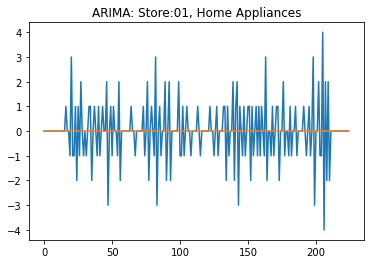

In [75]:
plt.title('ARIMA: Store:01, Home Appliances')
plt.plot(test1['sales'])
plt.plot(pred[0])
plt.show()

In [76]:
n = mean_squared_error(pred[0],test1['sales'])
rmse = sqrt(n)
print('RMSE of ARIMA is',rmse)

RMSE of ARIMA is 1.1234866446147134


<font size='3'>**Store: 9
            Family: Lingerie** </font>

**OLS**

In [158]:
train9_df

,id,date,store_nbr,family,sales,onpromotion
1770,1770,2013-01-01,9,LINGERIE,0.0,0
3552,3552,2013-01-02,9,LINGERIE,18.0,0
5334,5334,2013-01-03,9,LINGERIE,4.0,0
7116,7116,2013-01-04,9,LINGERIE,7.0,0
8898,8898,2013-01-05,9,LINGERIE,7.0,0
...,...,...,...,...,...,...
2993748,2993748,2017-08-11,9,LINGERIE,8.0,2
2995530,2995530,2017-08-12,9,LINGERIE,11.0,2
2997312,2997312,2017-08-13,9,LINGERIE,27.0,4
2999094,2999094,2017-08-14,9,LINGERIE,4.0,1


In [159]:
x = train9_df['id']
y = train9_df['sales']

In [160]:
x1 = sm.add_constant(x)
model = sm.OLS(y,x1)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     210.3
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           5.37e-45
Time:                        09:30:56   Log-Likelihood:                -5803.7
No. Observations:                1684   AIC:                         1.161e+04
Df Residuals:                    1682   BIC:                         1.162e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7070      0.371     36.995      0.000      12.980      14.434
id           -3.1e-06   2.14e-07    -14.503      0.000   -3.52e-06   -2.68e-06
==============================================================================
Omnibus:                     1729.698   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163298.315
Skew:                           4.772   Prob(JB):                         0.00
Kurtosis:                      50.288   Cond. No.                     3.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
y1 = 13.7070 + -3.1e-06*x

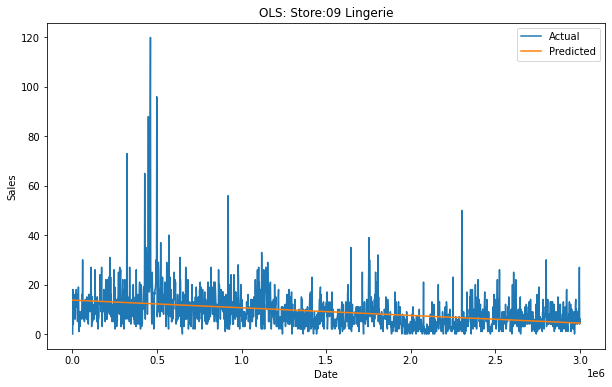

In [164]:
plt.figure(figsize=(10,6))
plt.title('OLS: Store:09 Lingerie')
plt.plot(x,y, label='Actual')
plt.plot(x,y1, label='Predicted')
plt.xlabel('Id')
plt.ylabel('sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [165]:
n = mean_squared_error(x,y1)
rmse = sqrt(n)
print('RMSE of OLS is',rmse)

RMSE of OLS is 1733318.2112943556


**Linear Regression**


In [166]:
from sklearn.linear_model import LinearRegression

In [172]:
train9_df

,id,date,store_nbr,family,sales,onpromotion
1770,1770,2013-01-01,9,LINGERIE,0.0,0
3552,3552,2013-01-02,9,LINGERIE,18.0,0
5334,5334,2013-01-03,9,LINGERIE,4.0,0
7116,7116,2013-01-04,9,LINGERIE,7.0,0
8898,8898,2013-01-05,9,LINGERIE,7.0,0
...,...,...,...,...,...,...
2993748,2993748,2017-08-11,9,LINGERIE,8.0,2
2995530,2995530,2017-08-12,9,LINGERIE,11.0,2
2997312,2997312,2017-08-13,9,LINGERIE,27.0,4
2999094,2999094,2017-08-14,9,LINGERIE,4.0,1


In [167]:
x = train9_df['id']
y = train9_df['sales']

In [168]:
x.shape

(1684,)

In [169]:
y.shape

(1684,)

In [170]:
x_new = x.values.reshape(-1,1)
x_new.shape

(1684, 1)

In [171]:
reg = LinearRegression()
reg.fit(x_new,y)

LinearRegression()

In [111]:
reg.score(x_new,y)

0.006401502395658287

In [112]:
reg.coef_

array([-8.75057574e-07])

In [113]:
reg.intercept_

8.495106914554784

In [173]:
new_data = pd.DataFrame(data=[2993748,2995530], columns=['id'])
new_data

,id
0,2993748
1,2995530


In [174]:
reg.predict(new_data)

C:\Users\tufF17\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([4.42623536, 4.42071104])

In [175]:
y1 = 8.495106914554784 + -8.75057574e-07*x_new

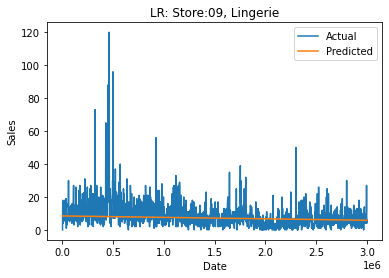

In [176]:
plt.title('LR: Store:09, Lingerie')
plt.plot(x,y, label='Actual')
plt.plot(x,y1,label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [177]:
n = mean_squared_error(x,y1)
rmse = sqrt(n)
print('RMSE of LR is',rmse)

RMSE of LR is 1733318.8690309601


**Multiple Linear Regression**

In [180]:
x = train9_df[['id','onpromotion']]
y = train9_df['sales']

In [181]:
reg = LinearRegression()
reg.fit(x,y)


LinearRegression()

In [182]:
reg.score(x,y)

0.1154115300719668

In [183]:
reg.coef_

array([-3.19831999e-06,  1.66416959e+00])

In [470]:
reg.intercept_

10.725302001544442

In [184]:
d = {'id':[2993748,2995530],'onpromotion':[2,2]}
new_data = pd.DataFrame(d)
new_data

,id,onpromotion
0,2993748,2
1,2995530,2


In [185]:
x['onpromotion'] = pd.to_numeric(x['onpromotion'], errors='coerce')

C:\Users\tufF17\AppData\Local\Temp/ipykernel_13780/3637824609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['onpromotion'] = pd.to_numeric(x['onpromotion'], errors='coerce')


In [186]:
y1 = -3.19831999e-06*x['id'] + 1.66416959e+00*x['onpromotion']+ 10.725302001544442 

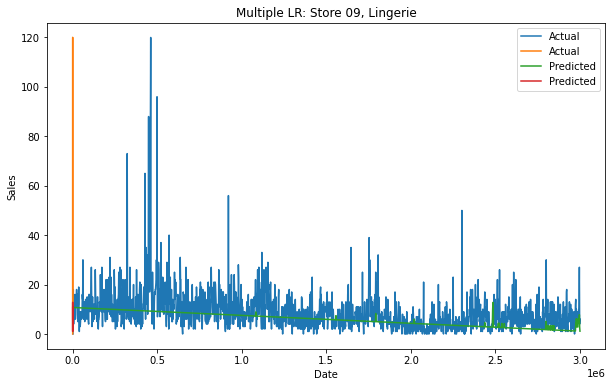

In [187]:
plt.figure(figsize=(10,6))
plt.title('Multiple LR: Store 09, Lingerie')

plt.plot(x,y, label='Actual')
plt.plot(x,y1, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**ARIMA**

In [188]:
t9_df = train9_df.copy()

In [189]:
t9_df

,id,date,store_nbr,family,sales,onpromotion
1770,1770,2013-01-01,9,LINGERIE,0.0,0
3552,3552,2013-01-02,9,LINGERIE,18.0,0
5334,5334,2013-01-03,9,LINGERIE,4.0,0
7116,7116,2013-01-04,9,LINGERIE,7.0,0
8898,8898,2013-01-05,9,LINGERIE,7.0,0
...,...,...,...,...,...,...
2993748,2993748,2017-08-11,9,LINGERIE,8.0,2
2995530,2995530,2017-08-12,9,LINGERIE,11.0,2
2997312,2997312,2017-08-13,9,LINGERIE,27.0,4
2999094,2999094,2017-08-14,9,LINGERIE,4.0,1


In [190]:
train_df = t9_df.loc[t9_df["date"]<='2017-01-01']
test_df = t9_df.loc[t9_df["date"]>'2017-01-01']

In [191]:
train_df

,id,date,store_nbr,family,sales,onpromotion
1770,1770,2013-01-01,9,LINGERIE,0.0,0
3552,3552,2013-01-02,9,LINGERIE,18.0,0
5334,5334,2013-01-03,9,LINGERIE,4.0,0
7116,7116,2013-01-04,9,LINGERIE,7.0,0
8898,8898,2013-01-05,9,LINGERIE,7.0,0
...,...,...,...,...,...,...
2591016,2591016,2016-12-28,9,LINGERIE,4.0,0
2592798,2592798,2016-12-29,9,LINGERIE,4.0,0
2594580,2594580,2016-12-30,9,LINGERIE,10.0,0
2596362,2596362,2016-12-31,9,LINGERIE,3.0,0


In [192]:
test_df

,id,date,store_nbr,family,sales,onpromotion
2599926,2599926,2017-01-02,9,LINGERIE,13.0,0
2601708,2601708,2017-01-03,9,LINGERIE,20.0,0
2603490,2603490,2017-01-04,9,LINGERIE,11.0,0
2605272,2605272,2017-01-05,9,LINGERIE,3.0,0
2607054,2607054,2017-01-06,9,LINGERIE,8.0,0
...,...,...,...,...,...,...
2993748,2993748,2017-08-11,9,LINGERIE,8.0,2
2995530,2995530,2017-08-12,9,LINGERIE,11.0,2
2997312,2997312,2017-08-13,9,LINGERIE,27.0,4
2999094,2999094,2017-08-14,9,LINGERIE,4.0,1


In [193]:
train9 = train_df.set_index('date')
test9 = test_df.set_index('date')

In [194]:
train9 = train9['sales']
test9 = test9['sales']

In [195]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(train9)

(0.01, False)

In [196]:
model = auto_arima(train9, start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=None,         
                      start_P=0, 
                      start_Q =0,
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10349.670, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10144.796, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10192.868, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11528.262, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=10124.599, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=10109.812, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=10093.977, Time=0.16 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=10089.056, Time=0.17 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=10011.085, Time=1.90 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=10009.219, Time=1.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=10008.003, Time=1.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10006.476, Time=0.85 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10039.034, Time=0.51 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10008.111, Time=1.18 sec
 ARIMA(1,0,2)(0,0,0

In [197]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1458
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -4998.223
Date:                Sun, 20 Aug 2023   AIC                          10006.447
Time:                        09:36:34   BIC                          10032.871
Sample:                             0   HQIC                         10016.305
                               - 1458                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0985      0.049      1.996      0.046       0.002       0.195
ar.L1          0.9894      0.004    222.324      0.000       0.981       0.998
ma.L1         -0.7636      0.011    -67.871      0.000      -0.786      -0.742
ma.L2         -0.1566      0.014    -11.203      0.000      -0.184      -0.129
sigma2        55.5782      0.753     73.857      0.000      54.103      57.053
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             72650.79
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             3.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [198]:
pred = model.predict(n_periods=226)

C:\Users\tufF17\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tufF17\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [199]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1770 to 2598144
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1458 non-null   int64  
 1   date         1458 non-null   object 
 2   store_nbr    1458 non-null   object 
 3   family       1458 non-null   object 
 4   sales        1458 non-null   float64
 5   onpromotion  1458 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 79.7+ KB


In [200]:
test9 = test9.reset_index()
pred = pred.reset_index()
pred

,index,0
0,1458,5.610166
1,1459,6.624139
2,1460,6.652094
3,1461,6.679752
4,1462,6.707115
...,...,...
221,1679,9.000384
222,1680,9.003036
223,1681,9.005660
224,1682,9.008256


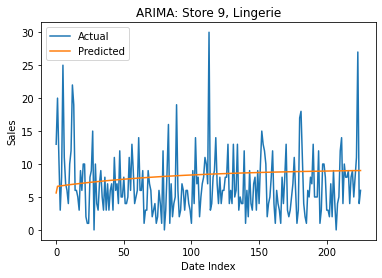

In [201]:
plt.title('ARIMA: Store 9, Lingerie')
plt.plot(test9['sales'],label = 'Actual')
plt.plot(pred[0],label='Predicted')
plt.xlabel('Date Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [203]:
n = mean_squared_error(pred[0],test9['sales'])
rmse = sqrt(n)
print('RMSE of ARIMA is',rmse)

RMSE of ARIMA is 5.0217052293846915


**Store: 15**

**Family: Grocery II**

OLS

In [204]:
train15_df

,id,date,store_nbr,family,sales,onpromotion
211,211,2013-01-01,15,GROCERY II,0.0,0
1993,1993,2013-01-02,15,GROCERY II,9.0,0
3775,3775,2013-01-03,15,GROCERY II,12.0,0
5557,5557,2013-01-04,15,GROCERY II,9.0,0
7339,7339,2013-01-05,15,GROCERY II,9.0,0
...,...,...,...,...,...,...
2992189,2992189,2017-08-11,15,GROCERY II,5.0,0
2993971,2993971,2017-08-12,15,GROCERY II,5.0,0
2995753,2995753,2017-08-13,15,GROCERY II,1.0,1
2997535,2997535,2017-08-14,15,GROCERY II,5.0,0


In [205]:
x = train15_df['id']
y = train15_df['sales']

In [206]:
x1 = sm.add_constant(x)
model = sm.OLS(y,x1)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     46.62
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           1.20e-11
Time:                        09:37:14   Log-Likelihood:                -6086.0
No. Observations:                1684   AIC:                         1.218e+04
Df Residuals:                    1682   BIC:                         1.219e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2583      0.438     28.000      0.000      11.400      13.117
id         -1.726e-06   2.53e-07     -6.828      0.000   -2.22e-06   -1.23e-06
==============================================================================
Omnibus:                     1615.092   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92076.309
Skew:                           4.441   Prob(JB):                         0.00
Kurtosis:                      38.119   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
y1 = 12.2583 + -1.726e-06*x

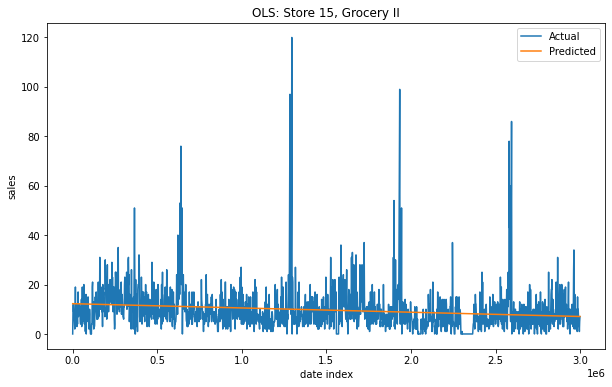

In [210]:
plt.figure(figsize=(10,6))
plt.title('OLS: Store 15, Grocery II')
plt.plot(x,y, label = 'Actual')
plt.plot(x,y1, label = 'Predicted')
plt.xlabel('date index')
plt.ylabel('sales')
plt.legend()
plt.show()

In [211]:
n = mean_squared_error(x,y1)
rmse = sqrt(n)
print('RMSE of OLS is',rmse)

RMSE of OLS is 1731966.928913723


**Linear Regression**

In [212]:
from sklearn.linear_model import LinearRegression

x = train15_df['id']
y = train15_df['sales']

In [213]:
x.shape

(1684,)

In [214]:
y.shape

(1684,)

In [215]:
x_new = x.values.reshape(-1,1)
x_new.shape

(1684, 1)

In [216]:
reg = LinearRegression()
reg.fit(x_new,y)

LinearRegression()

In [217]:
reg.score(x_new,y)

0.02697044759438072

In [218]:
reg.coef_

array([-1.72591731e-06])

In [219]:
reg.intercept_

12.25830238263995

In [220]:
new_data = pd.DataFrame(data=[2992189,2993971], columns=['id'])
new_data

,id
0,2992189
1,2993971


In [221]:
reg.predict(new_data)

C:\Users\tufF17\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([7.09403158, 7.090956  ])

In [222]:
y1 = 12.25830238263995 + -1.72591731e-06*x_new

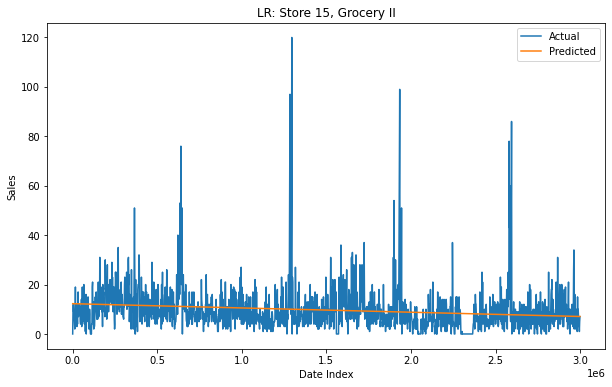

In [223]:
plt.figure(figsize=(10,6))
plt.title('LR: Store 15, Grocery II')
plt.plot(x,y, label='Actual')
plt.plot(x,y1, label='Predicted')
plt.xlabel('Date Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [224]:
n = mean_squared_error(x,y1)
rmse = sqrt(n)
print('RMSE of LR is',rmse)


RMSE of LR is 1731966.9287684432


**Multiple Linear Regression**

In [229]:
x = train15_df[['id','onpromotion']]
y = train15_df['sales']

In [230]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [231]:
reg.score(x,y)

0.028315677225110636

In [232]:
reg.coef_

array([-1.63223292e-06, -9.67194095e-01])

In [233]:
reg.intercept_

12.1901651605864

In [234]:
d = {'id':[2992189,2993971],'onpromotion':[0,0]}
new_data = pd.DataFrame(d)
new_data

,id,onpromotion
0,2992189,0
1,2993971,0


In [235]:
reg.predict(new_data)

array([7.30621576, 7.30330712])

In [236]:
x['onpromotion'] = pd.to_numeric(x['onpromotion'],errors='coerce')

C:\Users\tufF17\AppData\Local\Temp/ipykernel_13780/3701867195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['onpromotion'] = pd.to_numeric(x['onpromotion'],errors='coerce')


In [237]:
y1 = -1.63223292e-06*x['id'] + -9.67194095e-01*x['onpromotion']+ 12.1901651605864

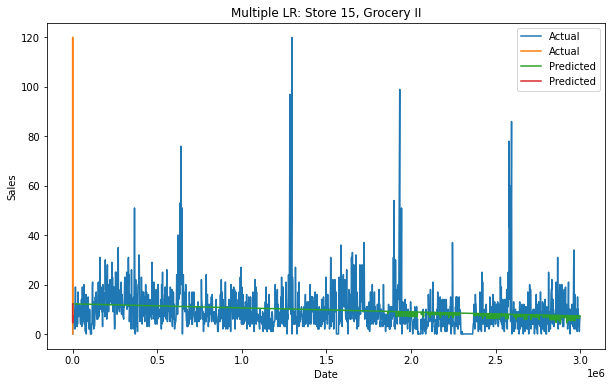

In [238]:
plt.figure(figsize=(10,6))
plt.title('Multiple LR: Store 15, Grocery II')

plt.plot(x,y, label='Actual')
plt.plot(x,y1, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**ARIMA**

In [239]:
from pmdarima.arima import auto_arima

from pmdarima.arima import ADFTest

In [240]:
t15_df = train15_df.copy()

In [241]:
train_df = t15_df.loc[t15_df["date"]<='2017-01-01']
test_df = t15_df.loc[t15_df["date"]>'2017-01-01']

In [242]:
train_df

,id,date,store_nbr,family,sales,onpromotion
211,211,2013-01-01,15,GROCERY II,0.0,0
1993,1993,2013-01-02,15,GROCERY II,9.0,0
3775,3775,2013-01-03,15,GROCERY II,12.0,0
5557,5557,2013-01-04,15,GROCERY II,9.0,0
7339,7339,2013-01-05,15,GROCERY II,9.0,0
...,...,...,...,...,...,...
2589457,2589457,2016-12-28,15,GROCERY II,5.0,0
2591239,2591239,2016-12-29,15,GROCERY II,19.0,0
2593021,2593021,2016-12-30,15,GROCERY II,60.0,0
2594803,2594803,2016-12-31,15,GROCERY II,86.0,0


In [243]:
train15 = train_df.set_index('date')
test15 = test_df.set_index('date')

In [244]:
train15 = train15['sales']
test15 = test15['sales']

In [245]:
train15

date
2013-01-01     0.0
2013-01-02     9.0
2013-01-03    12.0
2013-01-04     9.0
2013-01-05     9.0
              ... 
2016-12-28     5.0
2016-12-29    19.0
2016-12-30    60.0
2016-12-31    86.0
2017-01-01     0.0
Name: sales, Length: 1458, dtype: float64

In [246]:
test15

date
2017-01-02    9.0
2017-01-03    4.0
2017-01-04    2.0
2017-01-05    6.0
2017-01-06    8.0
             ... 
2017-08-11    5.0
2017-08-12    5.0
2017-08-13    1.0
2017-08-14    5.0
2017-08-15    7.0
Name: sales, Length: 226, dtype: float64

In [247]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(train15)

(0.01, False)

In [248]:
model = auto_arima(train15, start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=None,         
                      start_P=0, 
                      start_Q =0,
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=10702.578, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=10521.239, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=10445.982, Time=0.30 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=10421.412, Time=0.37 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=10420.698, Time=0.60 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=10421.987, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=10441.735, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=10348.704, Time=0.42 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=10341.089, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=10340.707, Time=0.71 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=10338.519, Time=0.76 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=10395.819, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=10340.429, Time=0.63 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=10349.987, Time=0.66 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=10336.032, Time=0.75

In [249]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1458
Model:               SARIMAX(4, 0, 1)   Log Likelihood               -5159.709
Date:                Sun, 20 Aug 2023   AIC                          10333.417
Time:                        09:41:38   BIC                          10370.411
Sample:                             0   HQIC                         10347.218
                               - 1458                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7936      0.225      3.532      0.000       0.353       1.234
ar.L1          0.9784      0.045     21.538      0.000       0.889       1.067
ar.L2         -0.0771      0.026     -2.976      0.003      -0.128      -0.026
ar.L3         -0.0830      0.028     -2.965      0.003      -0.138      -0.028
ar.L4          0.1032      0.020      5.103      0.000       0.064       0.143
ma.L1         -0.7003      0.048    -14.706      0.000      -0.794      -0.607
sigma2        69.3772      0.963     72.030      0.000      67.489      71.265
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             31163.93
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             2.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [250]:
pred = model.predict(n_periods=226)

pred

C:\Users\tufF17\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tufF17\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1458    20.162493
1459    19.577204
1460    27.271349
1461    24.292754
1462    22.915290
          ...    
1679    10.113198
1680    10.113198
1681    10.113198
1682    10.113198
1683    10.113198
Length: 226, dtype: float64

In [251]:
test15 = test15.reset_index()
pred = pred.reset_index()
pred

,index,0
0,1458,20.162493
1,1459,19.577204
2,1460,27.271349
3,1461,24.292754
4,1462,22.915290
...,...,...
221,1679,10.113198
222,1680,10.113198
223,1681,10.113198
224,1682,10.113198


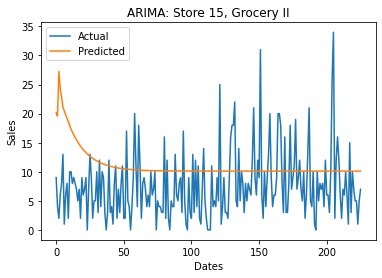

In [252]:
plt.title('ARIMA: Store 15, Grocery II')
plt.plot(test15['sales'],label='Actual')
plt.plot(pred[0],label='Predicted')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.show()

In [253]:
n = mean_squared_error(pred[0],test15['sales'])
rmse = sqrt(n)
print('RMSE of ARIMA is',rmse)

RMSE of ARIMA is 7.291581441376936


<Font size='3'>**Store: 49** 
    **Family: Grocery I**</font>

**OLS**

In [254]:
train49_df

,id,date,store_nbr,family,sales,onpromotion
1431,1431,2013-01-01,49,GROCERY I,0.0,0
3213,3213,2013-01-02,49,GROCERY I,5901.0,0
4995,4995,2013-01-03,49,GROCERY I,3521.0,0
6777,6777,2013-01-04,49,GROCERY I,3470.0,0
8559,8559,2013-01-05,49,GROCERY I,4712.0,0
...,...,...,...,...,...,...
2993409,2993409,2017-08-11,49,GROCERY I,7680.0,39
2995191,2995191,2017-08-12,49,GROCERY I,7030.0,37
2996973,2996973,2017-08-13,49,GROCERY I,7655.0,41
2998755,2998755,2017-08-14,49,GROCERY I,7366.0,41


In [255]:
x = train49_df['id']
y = train49_df['sales']

In [256]:
x1 = sm.add_constant(x)
model = sm.OLS(y,x1)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     1401.
Date:                Sun, 20 Aug 2023   Prob (F-statistic):          1.54e-223
Time:                        09:42:17   Log-Likelihood:                -15105.
No. Observations:                1684   AIC:                         3.021e+04
Df Residuals:                    1682   BIC:                         3.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3576.4382     92.793     38.542      0.000    3394.436    3758.441
id             0.0020   5.35e-05     37.426      0.000       0.002       0.002
==============================================================================
Omnibus:                      590.407   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3455.759
Skew:                           1.522   Prob(JB):                         0.00
Kurtosis:                       9.323   Cond. No.                     3.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [258]:
y1 = 3576.4382 + 0.0020*x

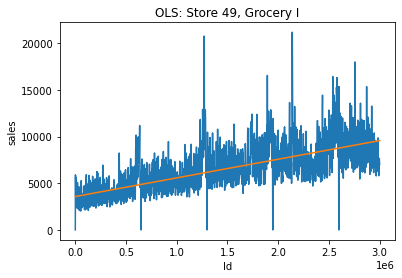

In [259]:
plt.title('OLS: Store 49, Grocery I')
plt.plot(x,y)
plt.plot(x,y1)
plt.xlabel('Id')
plt.ylabel('sales')
plt.show()

In [260]:
n = mean_squared_error(x,y1)
rmse = sqrt(n)
print('RMSE of OLS is',rmse)


RMSE of OLS is 1726468.3913806807


**Linear Regression**

In [261]:
from sklearn.linear_model import LinearRegression

In [262]:
x = train49_df['id']
y = train49_df['sales']

In [263]:
x.shape

(1684,)

In [264]:
y.shape

(1684,)

In [265]:
x_new = x.values.reshape(-1,1)
x_new.shape

(1684, 1)

In [266]:
reg = LinearRegression()
reg.fit(x_new,y)

LinearRegression()

In [267]:
reg.score(x_new,y)

0.4543752073025564

In [268]:
reg.coef_

array([0.00200393])

In [269]:
reg.intercept_

3576.4381541970447

In [270]:
new_data = pd.DataFrame(data=[2993409,2995191], columns=['id'])
new_data

,id
0,2993409
1,2995191


In [271]:
reg.predict(new_data)

C:\Users\tufF17\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([9575.0325017 , 9578.60351225])

In [273]:
y1 = 3576.4381541970447 + 0.00200393*x_new

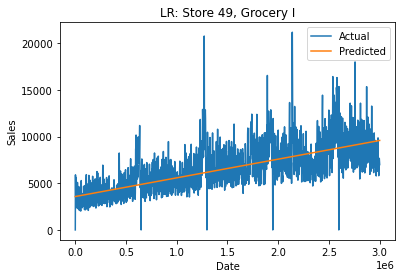

In [274]:
plt.title('LR: Store 49, Grocery I')
plt.plot(x,y, label = 'Actual')
plt.plot(x,y1, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [275]:
n = mean_squared_error(x,y1)
rmse = sqrt(n)
print('RMSE of LR is',rmse)

RMSE of LR is 1726461.5806117828


**Multiple Linear Regression**

In [276]:
x = train49_df[['id','onpromotion']]
y = train49_df['sales']

In [277]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [278]:
reg.score(x,y)

0.4607927572167786

In [279]:
reg.coef_

array([1.70899690e-03, 9.82535561e+00])

In [280]:
reg.intercept_

3765.868695042304

In [281]:
d = {'id':[2993409,2995191],'onpromotion':[39,37]}
new_data = pd.DataFrame(d)
new_data

,id,onpromotion
0,2993409,39
1,2995191,37


In [282]:
reg.predict(new_data)

array([9264.78427505, 9248.17899631])

In [283]:
x['onpromotion'] = pd.to_numeric(x['onpromotion'],errors = 'coerce')

C:\Users\tufF17\AppData\Local\Temp/ipykernel_13780/644220824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['onpromotion'] = pd.to_numeric(x['onpromotion'],errors = 'coerce')


In [285]:
y1 = 1.70899690e-03*x['id'] + 9.82535561e+00*x['onpromotion']+ 3765.868695042304

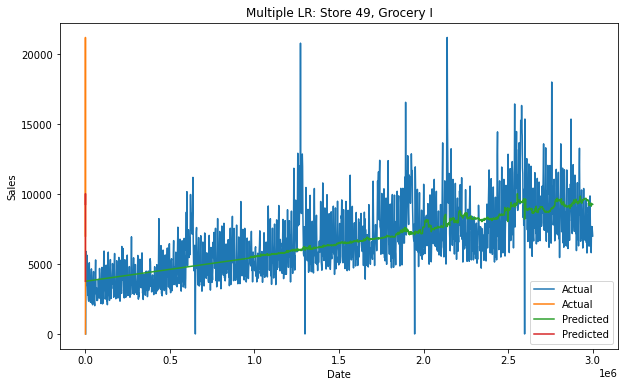

In [286]:
plt.figure(figsize=(10,6))
plt.title('Multiple LR: Store 49, Grocery I')

plt.plot(x,y, label='Actual')
plt.plot(x,y1, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**ARIMA**

In [287]:
from pmdarima.arima import auto_arima

from pmdarima.arima import ADFTest

In [288]:
t49_df = train49_df.copy()

In [289]:
train_df = t49_df.loc[t49_df["date"]<='2017-01-01']
test_df = t49_df.loc[t49_df["date"]>'2017-01-01']

In [290]:
train_df

,id,date,store_nbr,family,sales,onpromotion
1431,1431,2013-01-01,49,GROCERY I,0.0,0
3213,3213,2013-01-02,49,GROCERY I,5901.0,0
4995,4995,2013-01-03,49,GROCERY I,3521.0,0
6777,6777,2013-01-04,49,GROCERY I,3470.0,0
8559,8559,2013-01-05,49,GROCERY I,4712.0,0
...,...,...,...,...,...,...
2590677,2590677,2016-12-28,49,GROCERY I,9227.0,140
2592459,2592459,2016-12-29,49,GROCERY I,7784.0,149
2594241,2594241,2016-12-30,49,GROCERY I,10338.0,146
2596023,2596023,2016-12-31,49,GROCERY I,8206.0,145


In [291]:
train49 = train_df.set_index('date')
test49 = test_df.set_index('date')

In [292]:
train49 = train49['sales']
test49 = test49['sales']

In [293]:
train49

date
2013-01-01        0.0
2013-01-02     5901.0
2013-01-03     3521.0
2013-01-04     3470.0
2013-01-05     4712.0
               ...   
2016-12-28     9227.0
2016-12-29     7784.0
2016-12-30    10338.0
2016-12-31     8206.0
2017-01-01        0.0
Name: sales, Length: 1458, dtype: float64

In [294]:
test49

date
2017-01-02    15363.0
2017-01-03    12038.0
2017-01-04    11090.0
2017-01-05     8291.0
2017-01-06     9840.0
               ...   
2017-08-11     7680.0
2017-08-12     7030.0
2017-08-13     7655.0
2017-08-14     7366.0
2017-08-15     7001.0
Name: sales, Length: 226, dtype: float64

In [295]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(train49)

(0.01, False)

In [296]:
model = auto_arima(train49, start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=None,         
                      start_P=0, 
                      start_Q =0,
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=26954.639, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=26166.635, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=25940.223, Time=0.39 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=25882.752, Time=0.59 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=25783.030, Time=0.69 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=25783.204, Time=0.80 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=25772.857, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=25774.788, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=25709.790, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=25662.568, Time=0.24 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=25705.807, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=25774.807, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=25776.365, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=25704.117, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=25810.040, Time=1.22

In [297]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1458
Model:               SARIMAX(1, 0, 3)   Log Likelihood              -12825.284
Date:                Sun, 20 Aug 2023   AIC                          25662.568
Time:                        09:48:05   BIC                          25694.277
Sample:                             0   HQIC                         25674.398
                               - 1458                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    555.8953    109.350      5.084      0.000     341.573     770.218
ar.L1          0.9141      0.016     57.160      0.000       0.883       0.945
ma.L1         -0.2392      0.023    -10.532      0.000      -0.284      -0.195
ma.L2         -0.2655      0.033     -8.140      0.000      -0.329      -0.202
ma.L3         -0.0815      0.027     -3.017      0.003      -0.134      -0.029
sigma2      2.414e+06    4.7e+04     51.351      0.000    2.32e+06    2.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              2655.88
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               2.41   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [301]:
pred = model.predict(n_periods=226)

pred

C:\Users\tufF17\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tufF17\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1458    2760.249420
1459    5353.893915
1460    6104.933471
1461    6136.260316
1462    6164.895391
           ...     
1679    6469.515657
1680    6469.515657
1681    6469.515657
1682    6469.515657
1683    6469.515657
Length: 226, dtype: float64

In [302]:
test49 = test49.reset_index()
pred = pred.reset_index()
pred

,index,0
0,1458,2760.249420
1,1459,5353.893915
2,1460,6104.933471
3,1461,6136.260316
4,1462,6164.895391
...,...,...
221,1679,6469.515657
222,1680,6469.515657
223,1681,6469.515657
224,1682,6469.515657


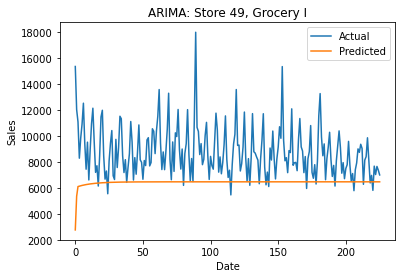

In [303]:
plt.title('ARIMA: Store 49, Grocery I')
plt.plot(test49['sales'], label = 'Actual')
plt.plot(pred[0], label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [305]:
n = mean_squared_error(pred[0],test49['sales'])
rmse = sqrt(n)
print('RMSE of ARIMA is',rmse)

RMSE of ARIMA is 3074.477130373834
